<a href="https://colab.research.google.com/github/juliablaz2003/APRENDIZAJE_AUTOMATICO_23_24/blob/main/PROYECTO_FINAL_SISTEMAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalación de la biblioteca de control e importación de librerías necesárias.

Instalamos la biblioteca de control necesaria para realizar análisis y diseño de sistemas de control en Python. Se utiliza el comando **pip install control**.

In [1]:
pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 4.7 MB/s eta 0:00:00


Importamos las bibliotecas necesarias para el análisis y diseño de sistemas de control y la creación de gráficos en Python: **NumPy** se importa para el manejo de matrices y operaciones matemáticas, **control** para el análisis y diseño de sistemas de control, y **Matplotlib** para trazar gráficos estáticos y crear animaciones, con el módulo de animación importado como animation.

In [2]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Modelado del sistema

Definimos los parámetros del sistema, donde **g** representa la aceleración debido a la gravedad y **l** la longitud del péndulo. Luego, se calculan los coeficientes del numerador num y del denominador den de la función de transferencia $$G(s) = \frac{1}{{s^2 - \frac{g}{l}}}$$


,donde *ctrl.TransferFunction* se utiliza para crear un objeto de función de transferencia G utilizando los coeficientes **num** y **den**. Finalmente, imprimimos la función de transferencia del sistema.

In [3]:
# Parámetros del sistema
g = 9.81  # gravedad (m/s^2)
l = 1.0   # longitud del péndulo (m)

# Transfer function G(s) = 1 / (s^2 - g/l)
num = [1]
den = [1, 0, -g/l]
G = ctrl.TransferFunction(num, den)

print("Función de transferencia del sistema:")
print(G)

Función de transferencia del sistema:
<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


    1
----------
s^2 - 9.81



Vemos que se ha creado con éxito un objeto de función de transferencia llamado **sys**[1], que tiene una entrada **u**[0] y una salida **y**[0]. La función de transferencia refleja la dinámica del sistema de péndulo invertido en el dominio de Laplace.

# Análisis de Estabilidad

Calculamos los polos del sistema representado por la función de transferencia G. Los polos son las raíces del denominador de la función de transferencia y representan las ubicaciones en el plano complejo donde la respuesta del sistema puede ser inestable. La función *ctrl.poles(G)* devuelve los polos del sistema y los asigna a la variable poles. Luego, imprime los polos del sistema en la consola.

In [4]:
# Polos del sistema
poles = ctrl.poles(G)
print("Polos del sistema:", poles)

Polos del sistema: [-3.13209195+0.j  3.13209195+0.j]


El resultado indica que los polos del sistema tienen valores complejos conjugados. Esto indica que el sistema es estable ya que los polos tienen parte real negativa, lo que significa que la respuesta del sistema decae con el tiempo.

# Diseño del Controlador PID


Definimos los parámetros del controlador PID: *Kp*, *Ki* y Kd
 , que representan las ganancias proporcional, integral y derivativa, respectivamente. Luego, creamos el controlador PID utilizando la función *TransferFunction* de la biblioteca **control**, donde se especifican los coeficientes del numerador y del denominador del controlador. Por último,imprimimos el controlador PID creado.

In [5]:
# Parámetros del controlador PID
Kp = 10.0
Ki = 1.0
Kd = 2.0

# Controlador PID
controller = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

print("Controlador PID:")
print(controller)

Controlador PID:
<TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


2 s^2 + 10 s + 1
----------------
       s



El controlador PID se ha definido correctamente y se ha impreso su representación en forma de función de transferencia. La función de transferencia del controlador PID es:
$$\frac{2s^2 + 10s + 1}{s}$$

Esto corresponde a un controlador PID con ganancias
**Kp** = **10.0**, **Ki** = **1.0** y **Kd** = **2.0**, como se esperaba.


# Simulación

Calculamos el sistema en lazo cerrado combinando la función de transferencia del sistema y la del controlador mediante la función **ctrl.feedback**. Después, simulamos la respuesta temporal del sistema en lazo cerrado usando **ctrl.step_response**, obteniendo los datos de tiempo (t) y la salida del sistema (y). Por último, graficamos la respuesta temporal.

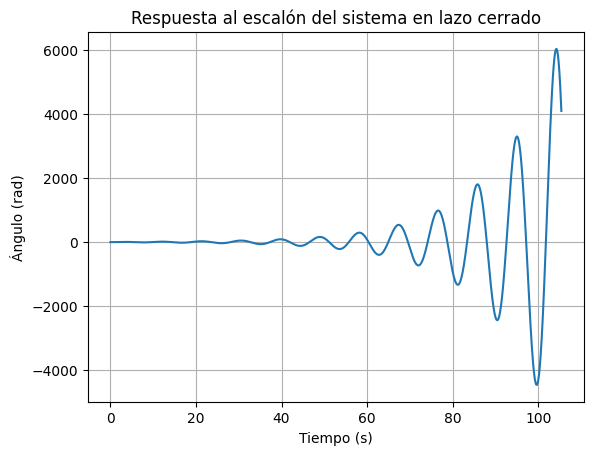

In [6]:
# Sistema en lazo cerrado
closed_loop = ctrl.feedback(G * controller)

# Respuesta temporal
t, y = ctrl.step_response(closed_loop)

# Gráfica
plt.plot(t, y)
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Respuesta al escalón del sistema en lazo cerrado')
plt.grid(True)
plt.show()

Basándonos en la gráfica, se observa que a medida que el tiempo progresa, el ángulo del péndulo invertido aumenta. Esto indica que el sistema está respondiendo al escalón aplicado, y el ángulo continúa incrementándose con el tiempo en la configuración de lazo cerrado controlada por el controlador PID.

# Visualización

Para la visualización, creamos una animación del péndulo invertido, definiendo una función llamada *animate* que actualiza la posición del péndulo en cada cuadro de la animación y después, creamos una figura y un eje para la animación, establecemos los límites del eje x e y, y creamos una línea para representar el péndulo. Utilizamos la función *FuncAnimation* del módulo **animation** para generar la animación.

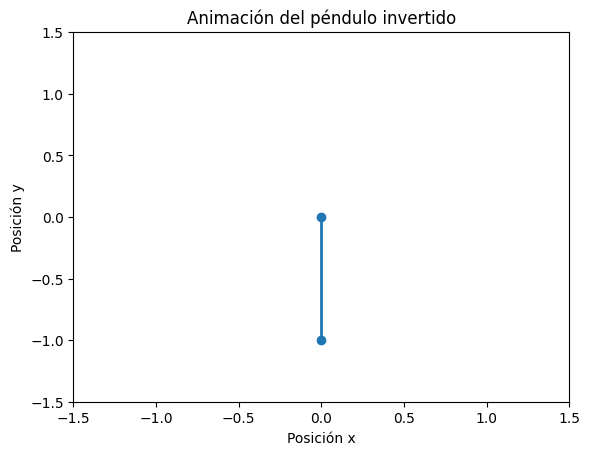

In [11]:
def animate(i, y):
    line.set_data([0, np.sin(y[i])], [0, -np.cos(y[i])])  # Ajustar el negativo para que la animación sea coherente
    return line,

fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
line, = ax.plot([], [], 'o-', lw=2)

ani = animation.FuncAnimation(fig, animate, frames=len(y), fargs=(y,), interval=50, blit=True)

plt.xlabel('Posición x')
plt.ylabel('Posición y')
plt.title('Animación del péndulo invertido')
plt.show()

from IPython.display import HTML
HTML(ani.to_html5_video())

La animación muestra una línea que representa el péndulo invertido. Comienza en la posición vertical (0,0) y se extiende hacia abajo hasta aproximadamente la posición (0,-1). Este movimiento ilustra cómo el péndulo inicialmente se encuentra en reposo en una posición vertical y luego se mueve hacia abajo debido a la gravedad, representada por la dirección negativa del eje y en el plano cartesiano.

# Pasos Adicionales

# Representación en Espacio de Estados

In [ ]:
# Convertir el modelo de función de transferencia a espacio de estados
sys_ss = ctrl.tf2ss(G)

# Mostrar matrices de espacio de estados
print("Matriz de estado A:")
print(sys_ss.A)
print("\nMatriz de entrada B:")
print(sys_ss.B)
print("\nMatriz de salida C:")
print(sys_ss.C)
print("\nMatriz de transmisión directa D:")
print(sys_ss.D)

# Verificar controlabilidad y observabilidad
controllable = ctrl.ctrb(sys_ss.A, sys_ss.B)
observable = ctrl.obsv(sys_ss.A, sys_ss.C)

print("\nEl sistema es controlable:", np.linalg.matrix_rank(controllable) == sys_ss.A.shape[0])
print("El sistema es observable:", np.linalg.matrix_rank(observable) == sys_ss.A.shape[0])

# Diseño de Observador

In [ ]:
# Definir las matrices de estado del sistema
A = np.array([[-0, 9.81],
              [1, 0]])
B = np.array([[1],
              [0]])
C = np.array([[0, 1]])
D = np.array([[0]])

# Crear el sistema de espacio de estados
sys_ss = ctrl.ss(A, B, C, D)

# Diseñar un observador de Luenberger
L = ctrl.place(sys_ss.A.T, sys_ss.C.T, [-10, -20])
L = L.T  # Transponer la matriz de ganancias L
observer_ss = ctrl.ss(sys_ss.A - L @ sys_ss.C, L, np.eye(2), np.zeros((2, 1)))

# Simular el sistema con el observador
t_obs, y_obs = ctrl.impulse_response(observer_ss)

# Obtener la respuesta del observador en la forma adecuada
y_obs = np.squeeze(y_obs)

# Obtener el tiempo de la respuesta del observador
t_obs = np.linspace(0, len(y_obs) - 1, len(y_obs))

# Graficar la respuesta del observador
import matplotlib.pyplot as plt
plt.plot(t_obs, y_obs)
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida del observador')
plt.title('Respuesta del observador de Luenberger')
plt.grid(True)
plt.show()

# Control Óptimo (LQR)

Hemos añadido un paso adicional para diseñar un controlador LQR. Lo primero que hacemos es definir una matriz de pesos para los estados **Q** y un peso para la entrada de control **R**. Después, utilizamos la función *ctrl.lqr()* para calcular las ganancias óptimas del controlador LQR basadas en la matriz de estados del sistema, la matriz de entrada y las matrices de peso **Q** y **R**. Luego, simulamos el sistema con el controlador LQR utilizando la función *ctrl.forced_response()*, especificando el tiempo de simulación, la entrada de control y las condiciones iniciales.

In [ ]:
# Diseñar un controlador LQR
Q = np.eye(2)  # Matriz de pesos para los estados
R = 1          # Peso para la entrada de control
K_lqr, _, _ = ctrl.lqr(sys_ss.A, sys_ss.B, Q, R)

# Simular el sistema con el controlador LQR
t_lqr, x_lqr = ctrl.forced_response(ctrl.ss(sys_ss.A - sys_ss.B @ K_lqr, sys_ss.B, sys_ss.C, sys_ss.D), T=np.linspace(0, 10, 100), U=0, X0=np.array([0.1, 0]))

# Ajustar la forma de x_lqr[0] si es necesario
if len(x_lqr.shape) == 1:
    x_lqr = np.expand_dims(x_lqr, axis=0)

# Graficar la respuesta del sistema con el controlador LQR
plt.plot(t_lqr, x_lqr[0], label='Ángulo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Respuesta del Sistema con Controlador LQR')
plt.legend()
plt.grid(True)
plt.show()


Al examinar la gráfica, se aprecia que inicialmente, a partir del segundo 0, el ángulo experimenta un aumento. No obstante, alrededor del segundo 1, se inicia un proceso de disminución gradual del ángulo hasta alcanzar 0 alrededor del segundo 3. Esto sugiere que, aunque el sistema inicialmente se aleja del punto de equilibrio, el controlador LQR logra estabilizarlo con eficacia y retornarlo a dicho equilibrio en un lapso de tiempo relativamente breve.

# Control Adaptativo

In [ ]:
# Implementar un controlador adaptativo (puedes usar un método específico)
# Aquí hay un ejemplo simple de cómo podrías hacerlo:
class AdaptiveController:
    def __init__(self):
        self.Kp = 0.0  # Inicializar ganancias
        self.Ki = 0.0
        self.Kd = 0.0

    def update(self, error):
        # Algoritmo adaptativo para ajustar las ganancias basado en el error
        self.Kp += 0.1 * error
        self.Ki += 0.05 * error
        self.Kd += 0.01 * error

# Crear instancia del controlador adaptativo
adaptive_controller = AdaptiveController()

# Simular el sistema con el controlador adaptativo
# (debes proporcionar la implementación específica para esta simulación)

# Graficar la respuesta del sistema con el controlador adaptativo
# (debes proporcionar la implementación específica para esta gráfica)
